# Distribution of Dyadic Relationships
Taking a look at interaction data and their distribution.

In [2]:
import os
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
import pylab as pl

metadata_dir = "/home/srivbane/shared/caringbridge/data/projects/sna-social-support/user_metadata"
csv_dir = "/home/srivbane/shared/caringbridge/data/projects/sna-social-support/csv_data"
n = 1000 # until i can run notebooks directly, this has to have a cap

### Author-To-Site Intx

In [2]:
author_to_site = os.path.join(metadata_dir, "interaction_metadata.h5")
# omit start and stop params upon full processing
df = pd.read_hdf(author_to_site, start=0, stop=n)
sorted_df = df.sort_values(by=["user_id", "site_id"])
sorted_df.head()

,user_id,site_id,int_type,created_at,updated_at,journal_oid,site_index,is_nontrivial,is_self_interaction
1010,2,2,guestbook,1117608630000,1117608630000,,-1.0,True,True
1011,2,2,guestbook,1117608738000,1117608738000,,-1.0,True,True
1012,2,2,guestbook,1117608791000,1117608791000,,-1.0,True,True
1014,2,2,guestbook,1117608849000,1117608849000,,-1.0,True,True
1016,2,2,guestbook,1117608995000,1117608995000,,-1.0,True,True


In [3]:
current_uid = -1
current_sid = -1
start_date = -1
end_date = -1
num_relationships = 1
tenures = []
for i, row in sorted_df.iterrows():
    if row["user_id"] != current_uid:
        # perform our calculations
        if current_uid != -1:
            tenures.append((current_uid, (end_date - start_date) / (1000 * 60 * 60 * 24), num_relationships))
        # start a new generation
        num_relationships = 1
        current_uid = row["user_id"]
        start_date = row["created_at"]
    else:
        if row["site_id"] != current_sid:
            num_relationships += 1
        # push out the end date
    current_sid = row["site_id"]
    end_date = row["created_at"]

In [4]:
vis_df = pd.DataFrame(tenures, columns=["uid", "tenure (days)", "num_relationships"])
nonzero_vis_df = vis_df[vis_df["tenure (days)"] >= 0]
one_relationship = nonzero_vis_df[nonzero_vis_df["num_relationships"] == 1]
mlt_relationship = nonzero_vis_df[nonzero_vis_df["num_relationships"] > 1]
avg_relationship = nonzero_vis_df["tenure (days)"]
print("{}% of dyads have nonnegative length".format(100 * len(nonzero_vis_df)/len(vis_df)))
print("{}% of dyads have one relationship; {}% of dyads have >1 relationships".format(100 * len(one_relationship)/len(vis_df), 
                                                                                      100 * len(mlt_relationship)/len(vis_df)))

98.2740021574973% of dyads have nonnegative length
89.96763754045307% of dyads have one relationship; 8.30636461704423% of dyads have >1 relationships


#### Translate from U2S to U2U using the above rule

### Basic Distribution

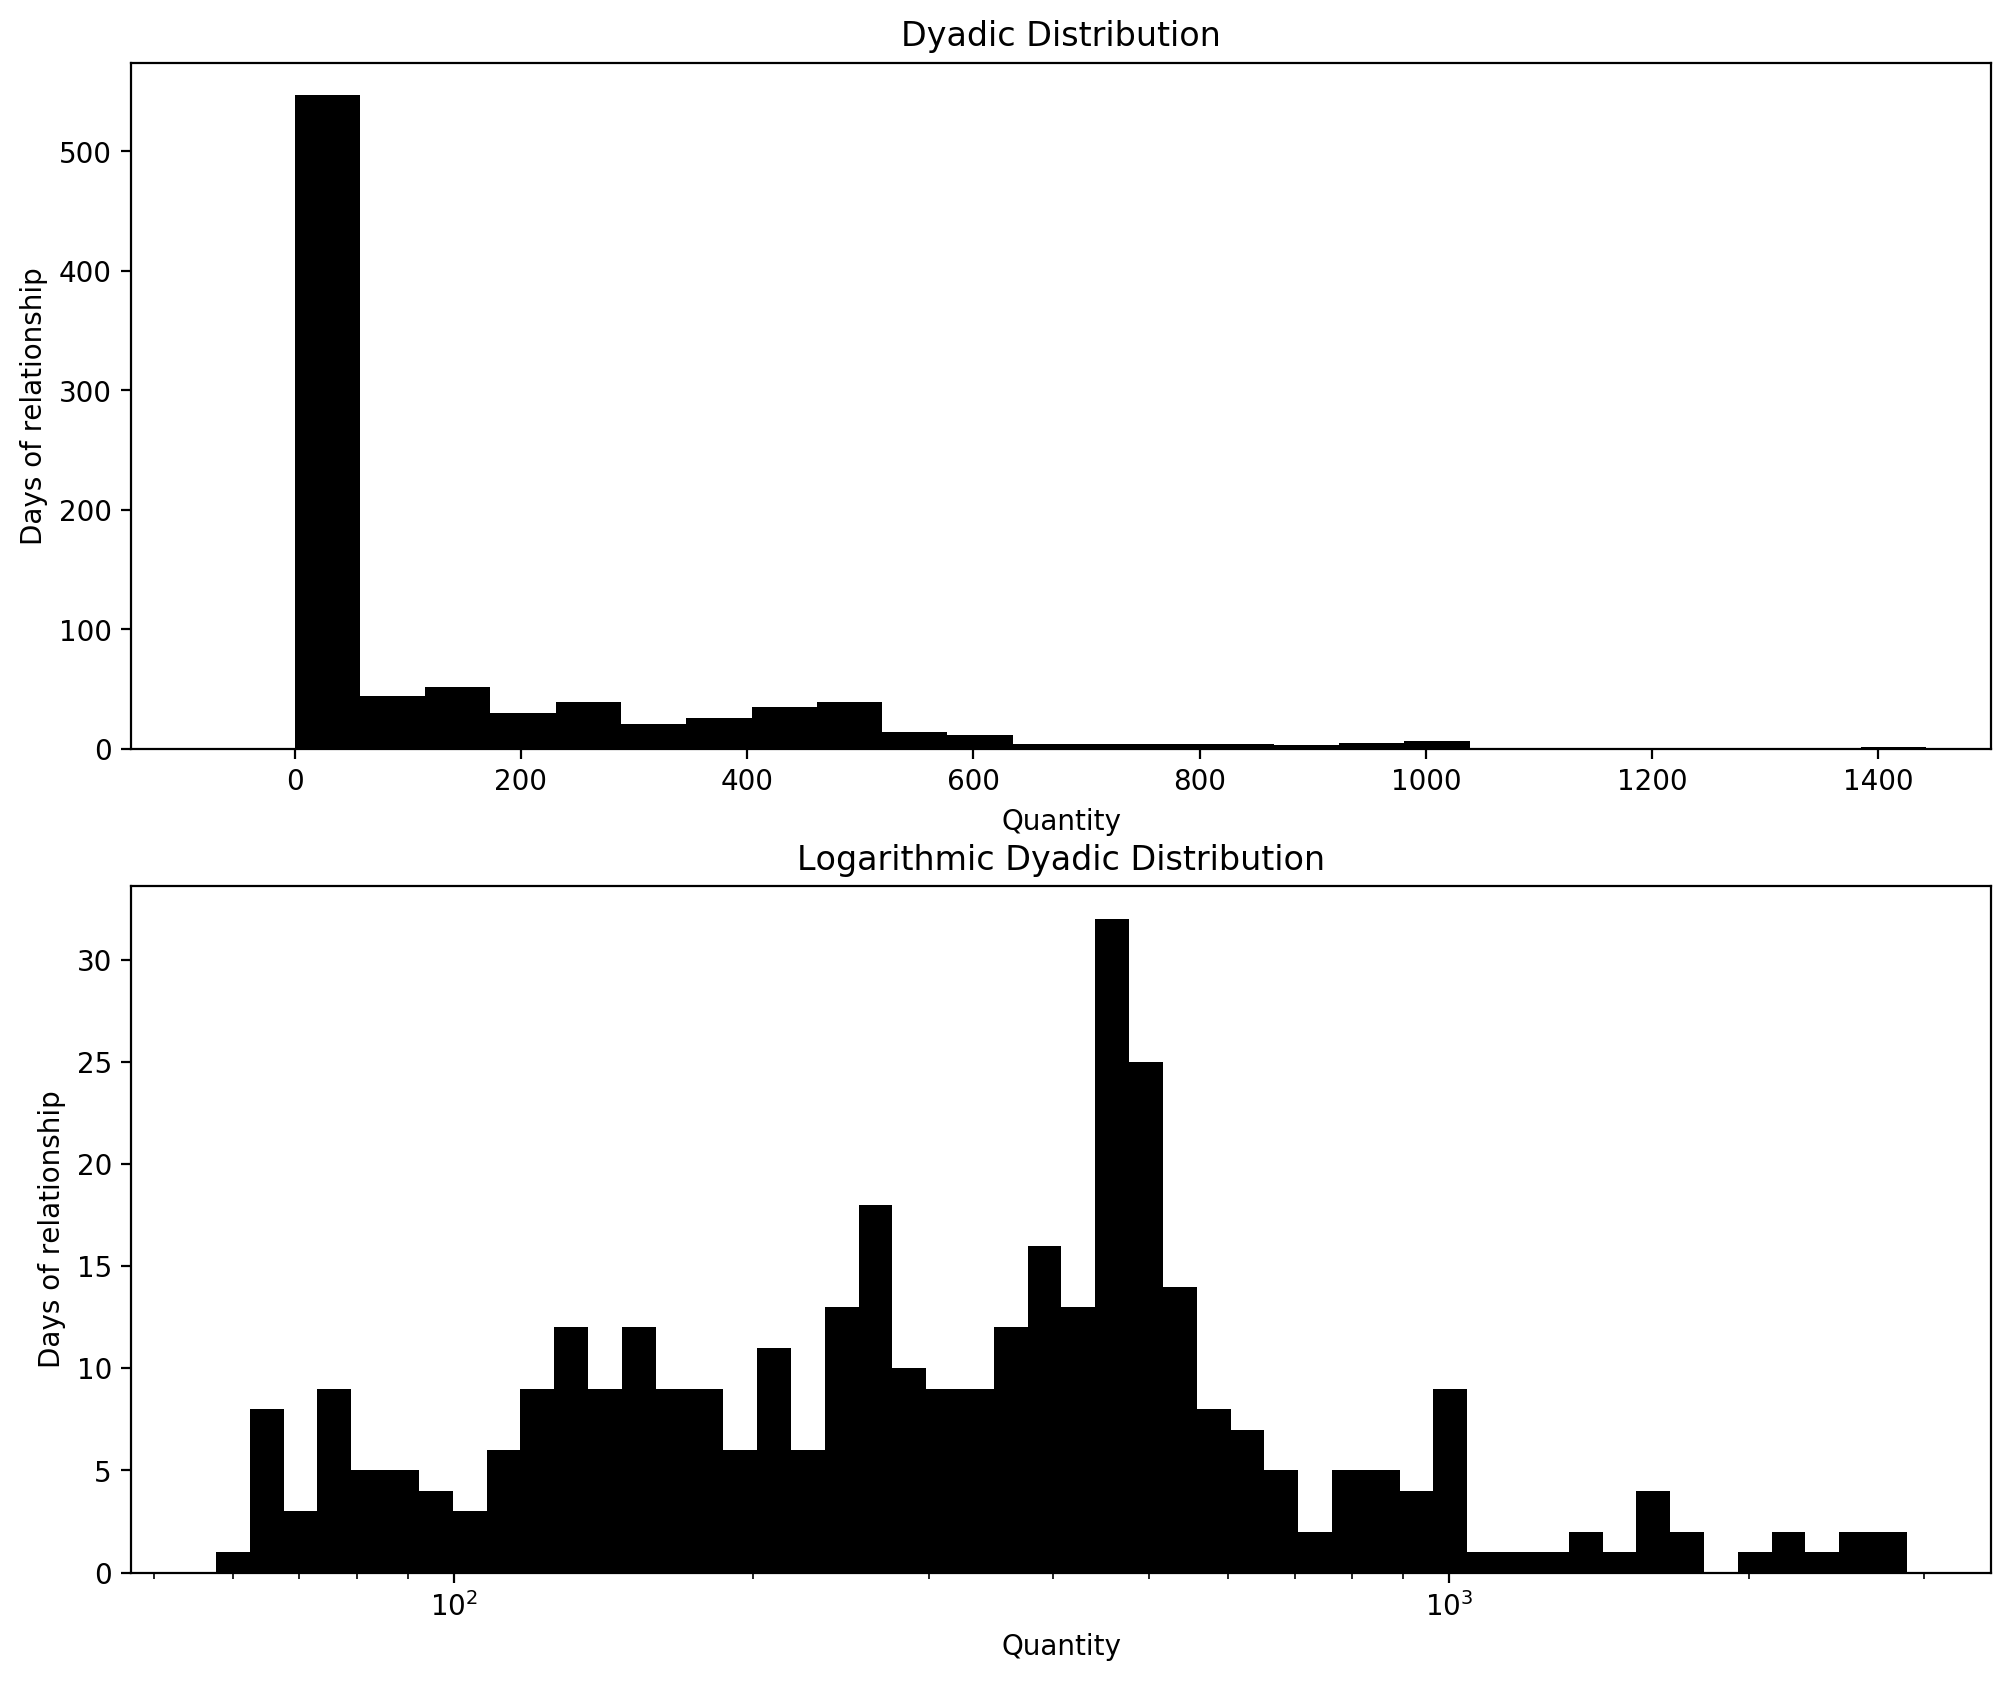

In [5]:
fig, ax = plt.subplots(2, 1,figsize=(12, 10), dpi= 200, facecolor='w', edgecolor='k')
hist, bins, _ = ax[0].hist(nonzero_vis_df["tenure (days)"], bins=50, color='black')
logbins = np.logspace(np.log10(bins[1]),np.log10(bins[-1]),len(bins))
ax[1].hist(nonzero_vis_df["tenure (days)"], bins=logbins, color='black')
ax[0].set_xlabel("Quantity")
ax[0].set_ylabel("Days of relationship")
ax[0].set_title("Dyadic Distribution")
ax[0].set_xlim(right=1500)
ax[1].set_xlabel("Quantity")
ax[1].set_ylabel("Days of relationship")
ax[1].set_title("Logarithmic Dyadic Distribution")
ax[1].set_xscale("log")
fig.savefig("regular.pdf", bbox_inches='tight')

### Single Dyad vs. Multiple Dyad
Interesting results! Seems that authors with multiple relationships tend to have longer relationships. This actually seems reasonable, but needs more investigation.

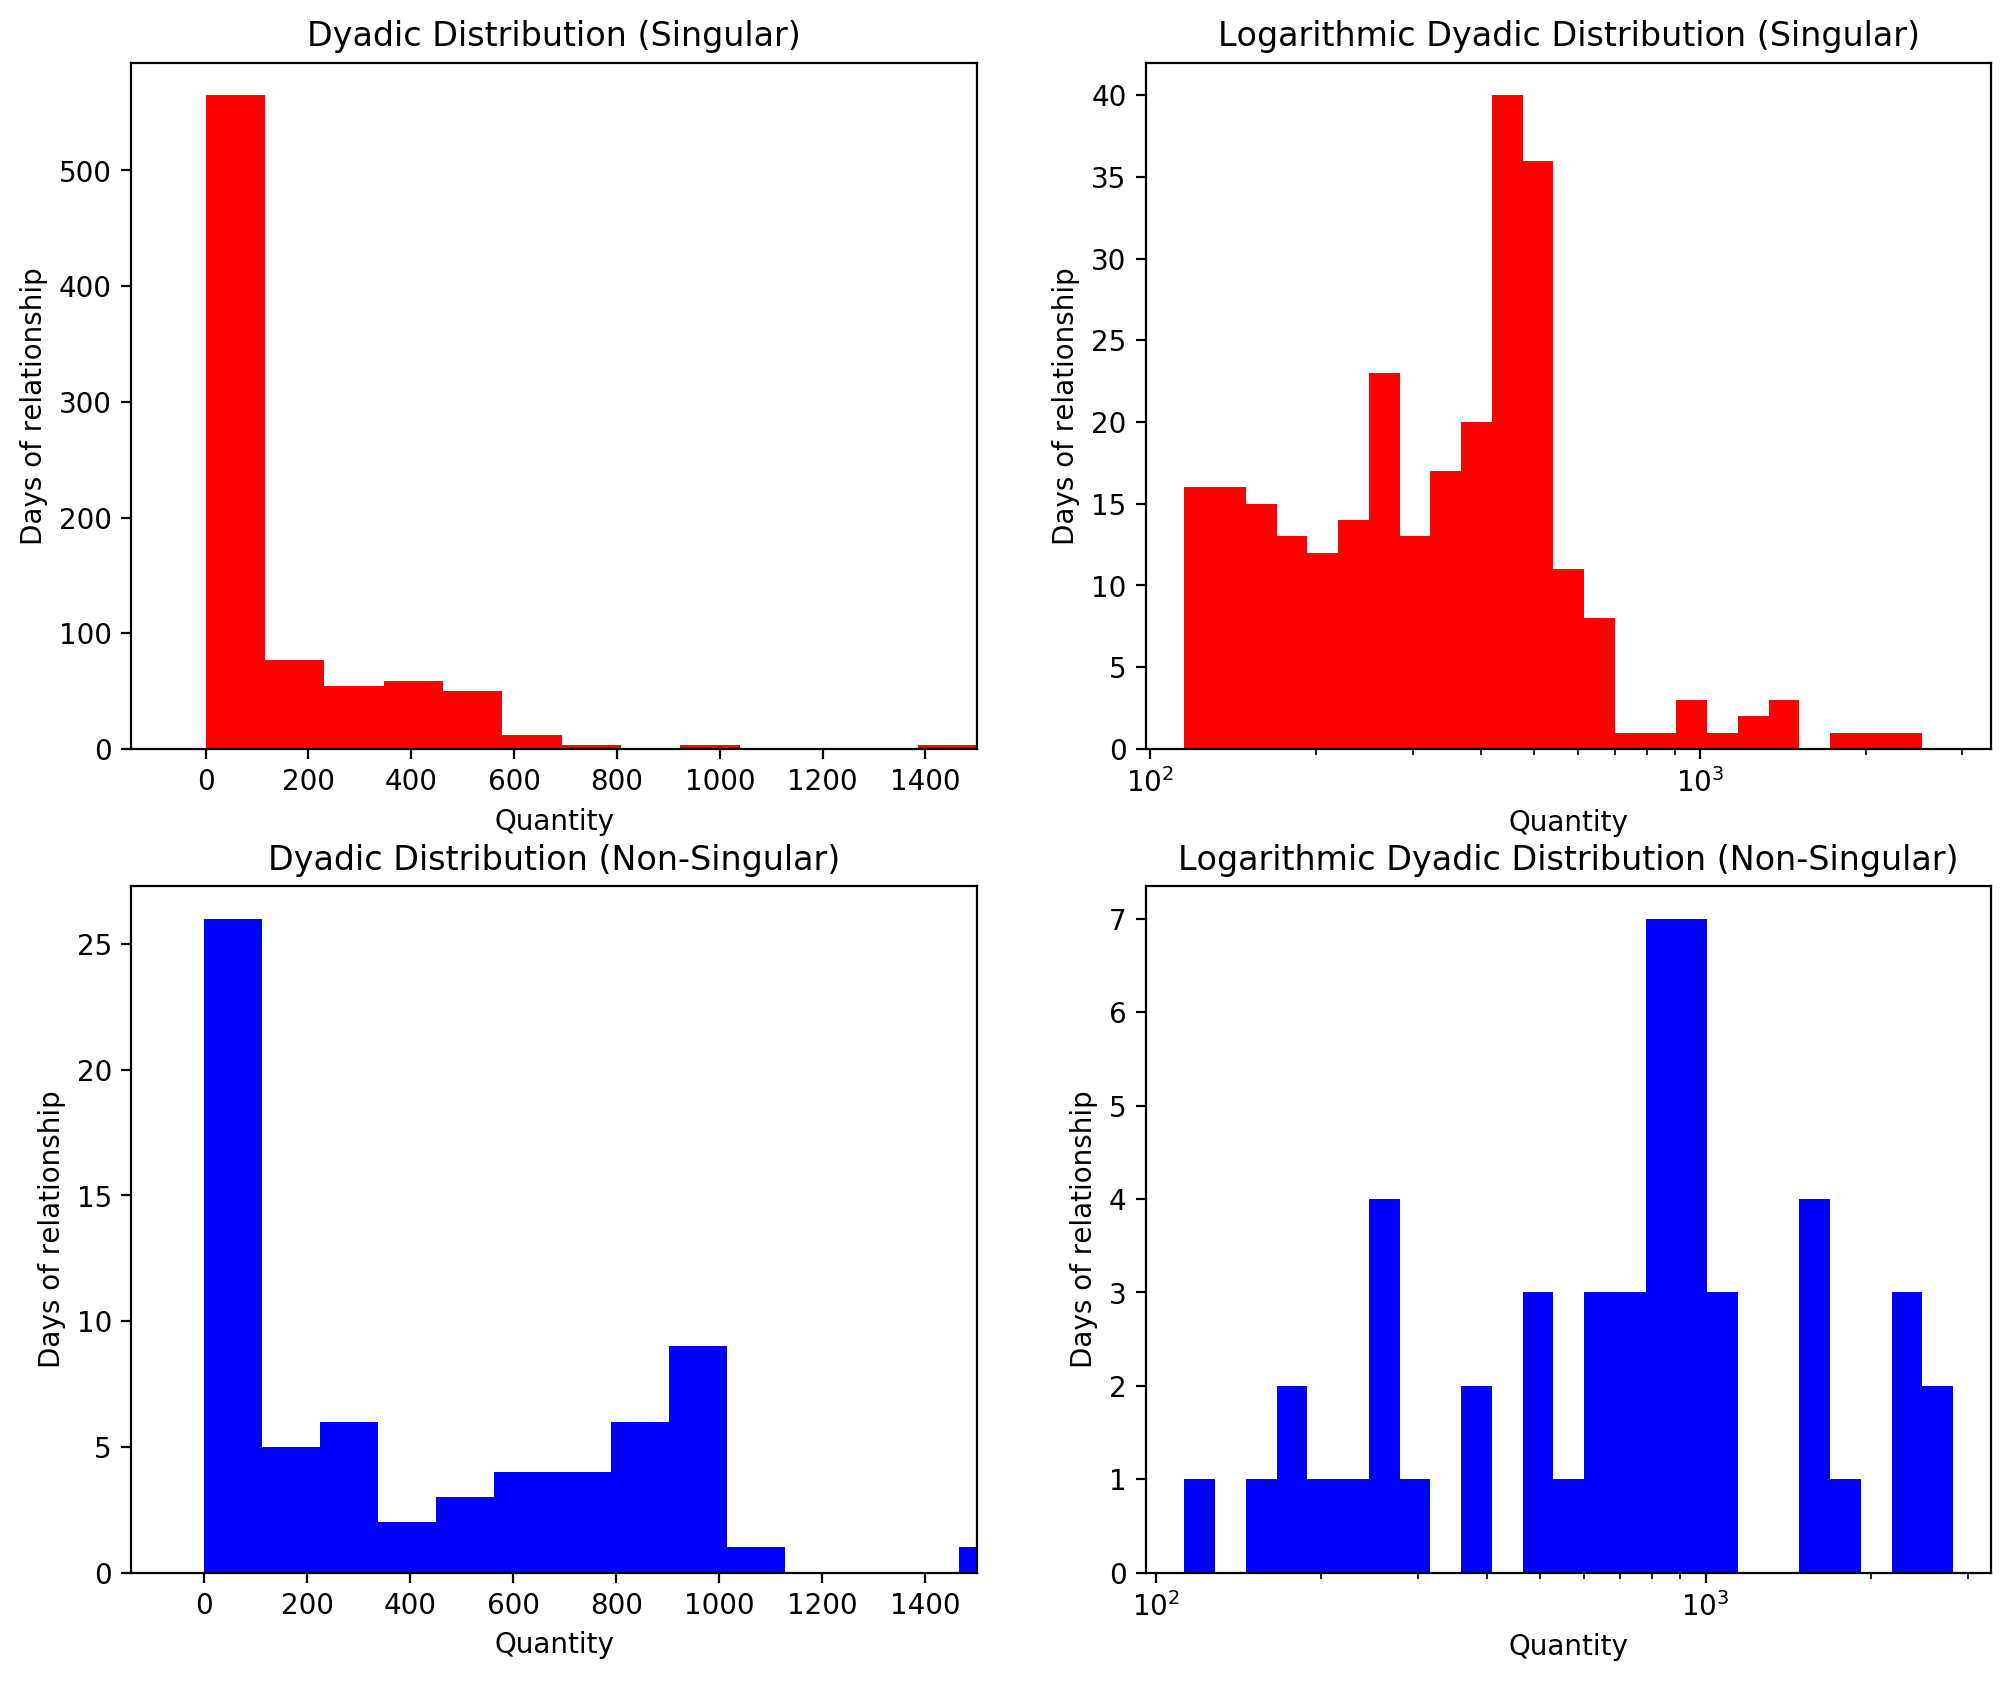

In [67]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10), dpi= 200, facecolor='w', edgecolor='k')
hist, bins, _ = ax[0][0].hist(one_relationship["tenure (days)"], bins=25, color='red')
logbins = np.logspace(np.log10(bins[1]),np.log10(bins[-1]),len(bins))
ax[0][1].hist(one_relationship["tenure (days)"], bins=logbins, color='red')
ax[0][0].set_xlabel("Quantity")
ax[0][0].set_ylabel("Days of relationship")
ax[0][0].set_title("Dyadic Distribution (Singular)")
ax[0][0].set_xlim(right=1500)
ax[0][1].set_xlabel("Quantity")
ax[0][1].set_ylabel("Days of relationship")
ax[0][1].set_title("Logarithmic Dyadic Distribution (Singular)")
ax[0][1].set_xscale("log")

hist, bins, _ = ax[1][0].hist(mlt_relationship["tenure (days)"], bins=25, color='blue')
logbins = np.logspace(np.log10(bins[1]),np.log10(bins[-1]),len(bins))
ax[1][1].hist(mlt_relationship["tenure (days)"], bins=logbins, color='blue')
ax[1][0].set_xlabel("Quantity")
ax[1][0].set_ylabel("Days of relationship")
ax[1][0].set_title("Dyadic Distribution (Non-Singular)")
ax[1][0].set_xlim(right=1500)
ax[1][1].set_xlabel("Quantity")
ax[1][1].set_ylabel("Days of relationship")
ax[1][1].set_title("Logarithmic Dyadic Distribution (Non-Singular)")
ax[1][1].set_xscale("log")
fig.savefig("num_relationships.pdf", bbox_inches='tight')